
# Lab I - Dimensionality Reduction
## Machine Learning II

Student: Alejandro Martínez Henández
CC: 1035877060
email: alejandro.martinezh@udea.edu.co

The project has the following structure:

```
lab1_AMH/
    Lab1.ipynb
    unsupervised/
        __init__.py
        dim_red/
            pca.py
            __init__.py
            svd.py
            __pycache__/
                __init__.cpython-311.pyc
                svd.cpython-311.pyc
                pca.cpython-311.pyc
        clustering/
            __init__.py
            tsne.py
            __pycache__/
                __init__.cpython-311.pyc
                t-sne.cpython-311.pyc
                tsne.cpython-311.pyc
        __pycache__/
            __init__.cpython-311.pyc
    images/
        portrait/
            portrait_i.jpg
            portrait_f.jpg
...
            color_result.png
            tsne.jpg
        SVD_face/
```

It is important to mention that the image file needs to be unzip. 

## 1.   Simulate any random rectangular matrix A.

> 1.1. What is the rank and trace of A?
>
> 1.2. What is the determinant of A?
>
> 1.3. Can you invert A? How?
>
> 1.4. How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?
>
> See [https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf]

In [56]:
# SIMULATE ANY RANDOM RECTANGULAR MATRIX A.

import numpy as np
import pandas as pd
import random

# We set a seed for the replicability of the exercise
np.random.seed(7)
random.seed(7)

# To make the matrix rectangular, we must guarantee that
# columns or lines are different.
# To keep it simple, we are gonna work with numbers from 1 to 10
lines = random.randint(2, 5)  # Random number of lines
cols = random.randint(6, 10)  # Random number of columns
a_matrix = np.random.rand(lines, cols)  # Random matrix A

# Printing the matrix to check its structure
print("The random matrix A is: \n", pd.DataFrame(a_matrix))

The random matrix A is: 
           0         1         2         3         4         5         6
0  0.076308  0.779919  0.438409  0.723465  0.977990  0.538496  0.501120
1  0.072051  0.268439  0.499883  0.679230  0.803739  0.380941  0.065936
2  0.288146  0.909594  0.213385  0.452124  0.931206  0.024899  0.600549
3  0.950130  0.230303  0.548490  0.909128  0.133169  0.523413  0.750410


### 1.1. What is the rank and trace of A?

For the rank, we could define it as the maximum amount of lines or columns that are linearly independent.


In [57]:
# Lets use the numpy library to find the trace
print("The RANK of Matrix A is: ", np.linalg.matrix_rank(a_matrix))

The RANK of Matrix A is:  4


For the trace of A matrix is something more complex in this particular case. We must take into acount that the trace of a matrix is defined only for square matrices (not the case for being a rectangularone).

If we apply de function np.trace() to the A matrix it will return a number (not an error), but this result is only the sum of the first diagonal.


**A Matrix:**

| 0 | 1              | 2              | 3              | 4              | 5        | 6        |          |
|---|----------------|----------------|----------------|----------------|----------|----------|----------|
| 0 | **_0.076308_** | 0.779919       | 0.438409       | 0.723465       | 0.977990 | 0.538496 | 0.501120 |
| 1 | 0.072051       | **_0.268439_** | 0.499883       | 0.679230       | 0.803739 | 0.380941 | 0.065936 |
| 2 | 0.288146       | 0.909594       | **_0.213385_** | 0.452124       | 0.931206 | 0.024899 | 0.600549 |
| 3 | 0.950130       | 0.230303       | 0.548490       | **_0.909128_** | 0.133169 | 0.523413 | 0.750410 |

$$ $$
**The "trace"**

$$0.076308 + 0.268439 + 0.213385 + 0.909128 = 1.46726...$$

In [58]:
# Lets use numpy again to find the trace
print("The TRACE of Matrix A is: ", np.trace(a_matrix))

The TRACE of Matrix A is:  1.467260997942475


### 1.2. What is the determinant of A?

Understanding a matrix as a transformation, taking a rectangular one implies that those don't have determinants because the concept of "volume scaling" or "orientation" doesn't apply in the same way when the dimension of the space changes.

As seen below, the determinant of a rectangular matrix throws an error.

In [ ]:
# Calculate the determinant of the matrix using numpy
determinant = np.linalg.det(a_matrix)

print("The determinant of the matrix is:", determinant)

LinAlgError: Last 2 dimensions of the array must be square

### 1.3. Can you invert A? How?

There are two conditions to get the invert of A.
1. The determinant must not be zero
2. The matrix must be square.

Unfortunately, in this case A is a rectangular matrix, so we cannot calculate the invert. However, there is an aproximation for that, a pseudoinvert for not square matrices.

The most common is the Moore-Penrose pseudoinvert, so let's apply using numpy.

In [59]:
# Calculating the Moore-Penrose pseudoinverse
a_matrix_pinv = np.linalg.pinv(a_matrix)

print("The Moore-Penrose pseudoinvert of A is: \n\n", a_matrix_pinv)

The Moore-Penrose pseudoinvert of A is: 

 [[-1.46674216  0.5668611   0.85511322  0.55988438]
 [ 0.81375903 -0.92628943  0.25101545 -0.16072449]
 [-0.39369825  0.75220841 -0.0730787   0.13344759]
 [-0.2447864   0.63215136 -0.11734817  0.23834804]
 [-0.74854864  1.07746466  0.70190101 -0.34812703]
 [ 2.08589621 -1.00207553 -1.5080336   0.09263059]
 [ 0.86961174 -1.24136992 -0.03685774  0.28390471]]


### 1.4. How are eigenvalues and eigenvectors of A’A and AA’ related?  What interesting differences can you notice between both?

- We must understand that that the product of that creates a square matrix 6x6 or 4x4, so both A'A and AA' are square matrices. Plus, are symetrical ones.

- $A^{T}A$ and $AA^{T}$ share some non-zero eigenvalues (as seen below), their eigenvectors are generally different because they belong to different dimensional spaces.






In [60]:
# We create AT
a_matrix_t = np.matrix.transpose(a_matrix)

# We find (AT)A and A(AT)
at_a = np.dot(a_matrix_t, a_matrix)
a_at = np.dot(a_matrix, a_matrix_t)

# With help of numpy, we find the eigenvector and eigenvalues
eigenvalue_at_a, eigenvector_at_a = np.linalg.eig(at_a)
eigenvalue_a_at, eigenvector_a_at = np.linalg.eig(a_at)

print("Eigenvalues of A^T * A: \n", eigenvalue_at_a, "\n")
print("Eigenvalues of A * A^T: \n", eigenvalue_a_at, "\n")

Eigenvalues of A^T * A: 
 [ 7.91363595e+00  1.29771643e+00  4.62856801e-01  6.37137149e-02
  9.63059691e-17 -3.15745078e-16  3.69566235e-17] 

Eigenvalues of A * A^T: 
 [7.91363595 1.29771643 0.06371371 0.4628568 ] 



## 2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.

> 2.1. Edit your picture to be 256x256 pixels, grayscale (single channel) and plot your edited face.
>
> 2.2. Calculate and plot the average face of the cohort.
>
> 2.3. How distant is your face from the average? How would you measure it?

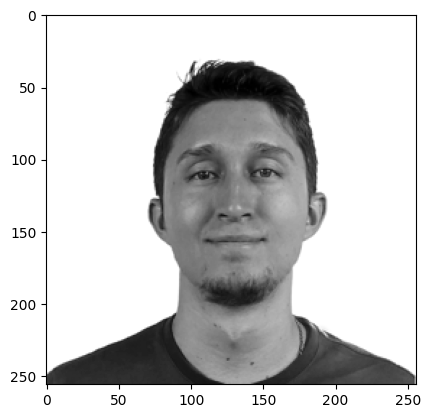

In [62]:
# 2.1. Edit your picture to be 256x256 pixels, grayscale
# (single channel) and plot your edited face.

from PIL import Image
import matplotlib.pyplot as plt

# Load the image
# CHANGE THE PATH BEFORE USING IT
image_path = 'images/portrait/portrait_i.jpg'
image = Image.open(image_path)

# Resize the image to 256x256 pixels
image_resized = image.resize((256, 256))

# Convert the image to grayscale
# As a note, my image was already in black and white,
# but I wanted to learn how to do it in code.
me_portrait = image_resized.convert('L')

# Display the image
plt.imshow(me_portrait, cmap='gray')
plt.show()

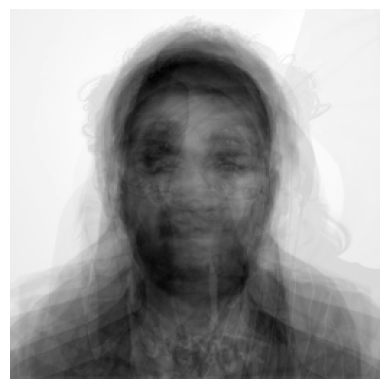

In [66]:
# 2.2. Calculate and plot the average face of the cohort.

import numpy as np
import os
from PIL import Image

# Define the folder where the images are stored
folder_path = 'images\group_images'

# Get a list of image filenames
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]

# Initialize an array to hold the sum of all images
sum_of_images = None
count = 0

# Loop over all image files
for image_file in image_files:
    # Construct the full image path
    image_path = os.path.join(folder_path, image_file)
    # Open the image file
    with Image.open(image_path) as img:
        # Convert image to grayscale (just in case it's not)
        gray_img = img.convert('L')
        # Convert image to a numpy array and add to the sum
        if sum_of_images is None:
            sum_of_images = np.asarray(gray_img, dtype=np.float32)
        else:
            sum_of_images += np.asarray(gray_img, dtype=np.float32)
        count += 1

average = sum_of_images/count

# Display the image
plt.imshow(average, cmap='gray')
plt.axis('off')
plt.show()

As we can see from the previous result, IS HORRIBLE.
To achieve something decent, we need to align all the images. For this exercise I must confese that due to the time, I used a image software editor to aling them, but only the eyes. I didn't take into account to aling the mouth because in that  case I would have to deform a lot of images and then... The exercise would be unfunny.

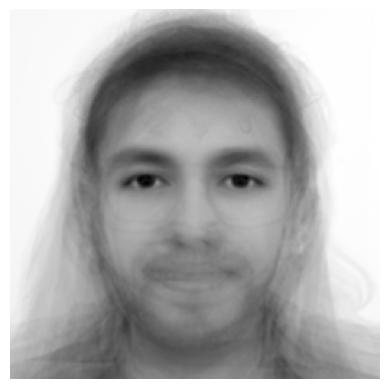

In [76]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory where the images are located
folder_path = 'images/group_images_2'

# Get a list of image filenames
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]

# Initialize an array to hold the sum of all images
sum_of_images = None
count = 0

# Loop over all image files
for image_file in image_files:
    # Build the full image path
    image_path = os.path.join(folder_path, image_file)
    # Open the image file and resize it
    with Image.open(image_path) as img:
        # Convert the image to grayscale (just in case it's not)
        gray_img = img.convert('L')
        # Convert the image to a NumPy array and add it to the sum
        if sum_of_images is None:
            sum_of_images = np.asarray(gray_img, dtype=np.float32)
        else:
            sum_of_images += np.asarray(gray_img, dtype=np.float32)
        count += 1

# Calculate the average of the images
average_face_array = sum_of_images / count

# Display the average face
plt.imshow(average_face_array, cmap='gray')
plt.axis('off')  # Optional: Removes the axes

# Save the current figure using plt.savefig()
plt.savefig('images/portrait_and_average/average_face_image.jpg',
 bbox_inches='tight', pad_inches=0)

The last image could be the result, but... Just out of curiosity I wanted to apply a contrast to certain areas of the image and then run it through the first image corrector I found on the web to see a more "real" result.

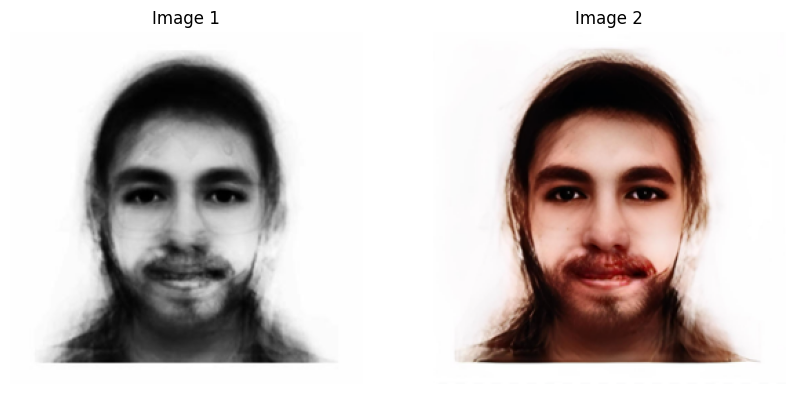

In [77]:
from PIL import Image
import matplotlib.pyplot as plt

# Paths to the images you want to open
image_path1 = 'images/fun/bw_result.jpg'
image_path2 = 'images/fun/color_result.png'

# Load the images using Pillow
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Resize the images to 256x256 pixels
image1_resized = image1.resize((256, 256))
image2_resized = image2.resize((256, 256))

# Setup the plotting area with matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in subplots
ax[0].imshow(image1_resized, cmap='gray')
ax[0].axis('off')  # Remove the axes for the first image
ax[0].set_title('Image 1')

ax[1].imshow(image2_resized, cmap='gray')
ax[1].axis('off')  # Remove the axes for the second image
ax[1].set_title('Image 2')

# Show the plot
plt.show()

### 2.3. How distant is your face from the average? How would you measure it?

For this problem, we could take two approximations:

1. **Quanlitative** Subtract the average face from my face. This will give me a difference image.

2. **Quantitative:** There are different ways. A simple method is to calculate the mean squared error (MSE) that quantifies the difference between two images.

For the next code, as we are going to work with my poortrait image and the average one, we could store them in a folder and them recover them for analysis

The Mean Squared Error between your face and the average face is: 2446.727294921875 



Text(0.5, 1.0, 'Image 2')

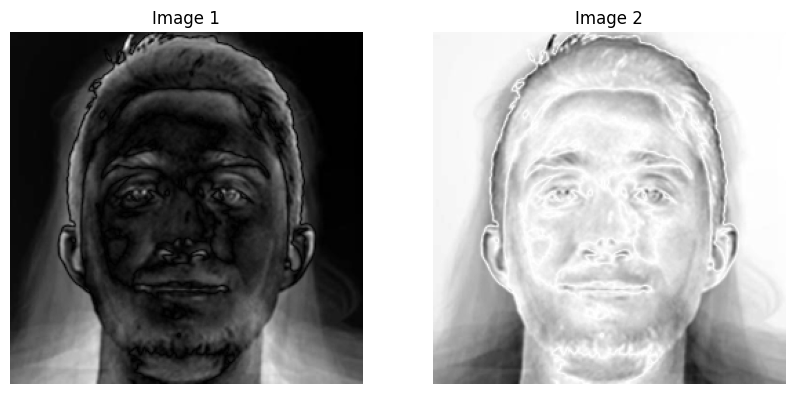

In [88]:
from PIL import Image
import numpy as np

# Load the images
my_image_path = 'images/portrait_and_average/portrait_f.jpg'
my_image = Image.open(my_image_path).convert('L')
my_image = my_image.resize((256, 256))  # Resize to match the average face dimensions

# Load the average face image
average_image_path = 'images/portrait_and_average/average_face_image.jpg'
average_image = Image.open(average_image_path).convert('L').resize((256, 256))

# Convert both images to numpy arrays
my_image_array = np.asarray(my_image, dtype=np.float32)
average_image_array = np.asarray(average_image, dtype=np.float32)

# Calculate the difference
difference_array = my_image_array - average_image_array

# Calculate a simple metric such as the Mean Squared Error
mse = np.mean((difference_array) ** 2)

# Convert the difference array back to an image to visualize it
difference_image = Image.fromarray(np.uint8(np.abs(difference_array)))

# Print out the MSE
print(f"The Mean Squared Error between your face and the average face is: {mse} \n")

# Invert the image by subtracting it from its maximum value
difference_array = np.array(difference_image)
inverted_array = 255 - difference_array

# Set everything for visualization
image1 = difference_image
image2 = inverted_array

# Setup the plotting area with matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in subplots
ax[0].imshow(image1, cmap='gray')
ax[0].axis('off')  # Remove the axes for the first image
ax[0].set_title('Image 1')

ax[1].imshow(image2, cmap='gray')
ax[1].axis('off')  # Remove the axes for the second image
ax[1].set_title('Image 2')

As seen above, the "Image 1" is the result of the rest with the average_face. The "Image 2" is the inverse only  to check more changes. 

Even when the Mean Squared Error (MSE) can tell us the difference between two images, it is really difficult to dimensionalize it without more data to compare, for that reason let's create a plot of the MSE of all the images.

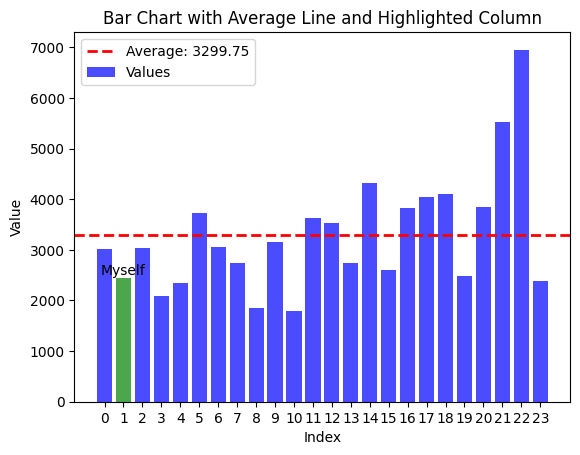

In [79]:
from PIL import Image
import numpy as np

average_image_path = 'images/portrait_and_average/average_face_image.jpg'

# Load the average face image
average_image = Image.open(average_image_path).convert('L').resize((256, 256))
average_image_array = np.asarray(average_image, dtype=np.float32)

# Define the folder where the images are stored
folder_path = 'images/group_images_2'

# Get a list of image filenames
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]

mse = np.array([])

# Loop over all image files
for image_file in image_files:
    # Construct the full image path
    image_path = os.path.join(folder_path, image_file)
    # Open the image file
    with Image.open(image_path) as img:
        # Convert image to grayscale (just in case it's not)
        img = img.convert('L').resize((256, 256))
        # Convert image to a numpy array
        image_array = np.asarray(img, dtype=np.float32)
        # Convert image to a numpy array and add to the sum

        # Calculate the difference
        difference_array = img - average_image_array
        mse = np.append(mse, np.mean((difference_array) ** 2))


# Calculate the average of the array
average = np.mean(mse)

# Indices for each bar (value) in the bar chart
indices = np.arange(len(mse))

# Colors for the bars, 'blue' for most, 'green' for the second (highlighted)
colors = ['blue'] * len(mse)  # Default color for all
colors[1] = 'green'  # Highlight the second column

# Plot the bars, one for each value of the array, with colors
plt.bar(indices, mse, alpha=0.7, color=colors, label='Values')

# Add the horizontal line for the average
plt.axhline(average, color='r', linestyle='dashed', linewidth=2, label=f'Average: {average:.2f}')

# Add a note for the second column
plt.text(1, mse[1] + 0.1, 'Myself', ha='center', va='bottom')

# Add legends and titles for clarity
plt.legend()
plt.title('Bar Chart with Average Line and Highlighted Column')
plt.xlabel('Index')
plt.ylabel('Value')

# Adjust the x-axis ticks to match the indices
plt.xticks(indices)

# Display the plot
plt.show()

Here we have a better look. Keeping in mind that the MSE is how far the image is from the average face, if the column is below the red line (the average MSE) it means that the face is closer to the average face.

My face in particular is the green column, I'm below the average MSE, it means that my face closer to the average face compare to others.

## 3. Let’s create the unsupervised Python package

**To the reader, you can check the packeges outside this notebook**

## 4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?

The MSE of the images is: 1.1027306831299903


Text(0.5, 1.0, 'Reconstructed')

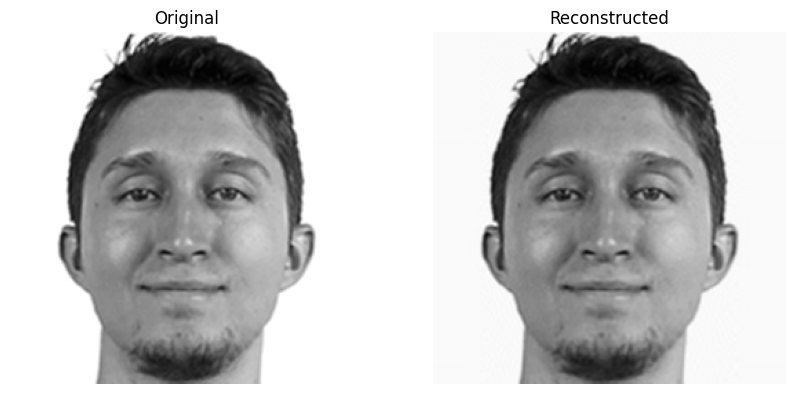

In [110]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from unsupervised.dim_red.svd import SVD

# Load and process the image
image_path = "images/portrait/portrait_f.jpg"
image = Image.open(image_path)
image_resized = image.resize((256, 256)).convert('L')
img_array = np.array(image_resized)

# Initialize and apply SVD
svd = SVD(n_components=70)  # Adjust n_components as needed
svd.fit(img_array)  # Fit the model to the data

# Now, use the U, S, and VT attributes for reconstruction
reconstructed = np.dot(svd.U * svd.S, svd.VT) 

# Set everything for visualization
image1 = image_resized
image2 = reconstructed

# Calculate the differences of images through MSE
mse = np.mean((image1 - image2) ** 2)
print(f"The MSE of the images is: {mse}")

# Setup the plotting area with matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in subplots
ax[0].imshow(image1, cmap='gray')
ax[0].axis('off')  # Remove the axes for the first image
ax[0].set_title('Original')

ax[1].imshow(image2, cmap='gray')
ax[1].axis('off')  # Remove the axes for the second image
ax[1].set_title('Reconstructed')

The term "appropriately reproduced" understood as if the reconstructed image is similar (almost exact) to the original, gives as result that we need 70 singular values. The MSE gives us a result of 1.1027, relatively close to zero, then the  images are similar

If we are looking to get an image where we could identify the similarities with the original, we could  use 10 singular values, but the MSE of 145.469 tells us than there les similarities. 

## 5. Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?

The following code imports the data and then set the funtion for a logistic regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

# Filter for 0's and 8's
is_0_or_8 = (y == 0) | (y == 8)
X_filtered = X[is_0_or_8]
y_filtered = y[is_0_or_8]

# Logistic Regresion funtion

def logre(X_filtered, y_filtered):

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the logistic regression model with a maximum number of iterations
    model = LogisticRegression()

    # Train the model with scaled data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)

    # Calculate and display evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=8)
    recall = recall_score(y_test, predictions, pos_label=8)
    f1 = f1_score(y_test, predictions, pos_label=8)

    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')

In [117]:
# Results with normal data
logre(X_filtered, y_filtered)

Accuracy: 99.16%
Precision: 99.12%
Recall: 99.19%
F1 Score: 99.16%


## 6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.
- Plot the 2 new features generated by your algorithm
- Does this somehow impact the performance of your model?

In [120]:
from unsupervised.dim_red.svd import SVD
from unsupervised.dim_red.pca import PCA

# Apply SVD for dimensionality reduction
# Create a SVD object with 2 components
svd = SVD(n_components=2)
X_reduced_SVD = svd.fit_transform(X_filtered)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca.fit(X_filtered)
X_reduced_PCA = pca.transform(X_filtered)

In [121]:
# Results with SVD reduce data
logre(X_reduced_SVD, y_filtered)

Accuracy: 95.52%
Precision: 94.28%
Recall: 96.84%
F1 Score: 95.54%


In [123]:
# Results with SVD reduce data
logre(X_reduced_PCA, y_filtered)

Accuracy: 95.48%
Precision: 94.59%
Recall: 96.40%
F1 Score: 95.49%


The accuracy, precision, recall and F1 decreased a bit and the time it took to process was 10 times faster (0.1 seconds).

In [125]:
from unsupervised.clustering.tsne import TSNE

# Apply SVD for dimensionality reduction
# Create a SVD object with 2 components
tsne = TSNE(n_components=2)
X_reduced_TSNE = tsne.fit_transform(X_filtered)

i:\Mi unidad\Materias\Aprendizaje automático II\Laboratorio 1\lab1_AMH\unsupervised\clustering\tsne.py:6: RuntimeWarning: divide by zero encountered in log
  H = np.log(sumP) + beta * np.sum(D * P) / sumP
i:\Mi unidad\Materias\Aprendizaje automático II\Laboratorio 1\lab1_AMH\unsupervised\clustering\tsne.py:6: RuntimeWarning: invalid value encountered in divide
  H = np.log(sumP) + beta * np.sum(D * P) / sumP
i:\Mi unidad\Materias\Aprendizaje automático II\Laboratorio 1\lab1_AMH\unsupervised\clustering\tsne.py:7: RuntimeWarning: divide by zero encountered in divide
  P = P / sumP
i:\Mi unidad\Materias\Aprendizaje automático II\Laboratorio 1\lab1_AMH\unsupervised\clustering\tsne.py:7: RuntimeWarning: invalid value encountered in divide
  P = P / sumP


KeyboardInterrupt: 

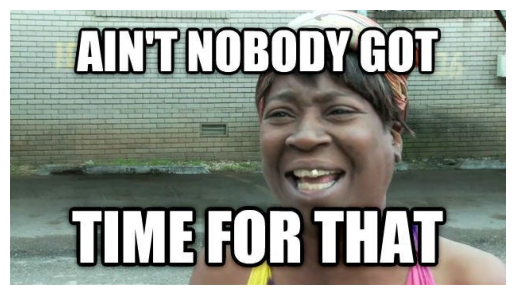

In [132]:
# T-SNE took a lot of time...

image_path = 'images/fun/tsne.jpg'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off') 
plt.show()

## 7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?

In [127]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# Applying PCA
pca = PCA(n_components=2)
X_reduced_PCA_slk = pca.fit_transform(X_filtered)

# Applying  SVD
svd = TruncatedSVD(n_components=2)
X_reduced_SVD_slk = svd.fit_transform(X_filtered)

# Applying TSNE
X_reduced_tsne_slk = TSNE(n_components=2).fit_transform(X_filtered)

In [128]:
# Results with PCA from Scikit-Learn reduce data
logre(X_reduced_PCA_slk, y_filtered)

Accuracy: 95.48%
Precision: 94.59%
Recall: 96.40%
F1 Score: 95.49%


In [129]:
# Results with SVD from Scikit-Learnreduce data
logre(X_reduced_SVD_slk, y_filtered)

Accuracy: 95.52%
Precision: 94.28%
Recall: 96.84%
F1 Score: 95.54%


In [130]:
# Results with T-SNE from Scikit-Learn reduce data
logre(X_reduced_tsne_slk, y_filtered)

Accuracy: 99.67%
Precision: 99.63%
Recall: 99.71%
F1 Score: 99.67%


### Analysis from points 6 and 7.

| /         | NORMAL | PCA   | SVD   | T-SNE | PCA SKL | SVD SKL | T-SNE SKL |
| --------- | ------ | ----- | ----- | ----- | ------- | ------- | --------- |
| TIME (s)  | 1.1    | 0.9   | 0.1   | \-    | 0.7     | 0.1     | 0.1       |
| ACCURACY  | 99.16  | 95.48 | 95.52 | \-    | 95.48   | 95.52   | 99.67     |
| PRECISION | 99.12  | 94.59 | 94.28 | \-    | 94.59   | 94.28   | 99.63     |
| RECALL    | 99.19  | 96.40 | 96.84 | \-    | 96.40   | 96.83   | 99.71     |
| F1 SCORE  | 99.16  | 95.49 | 95.54 | \-    | 95.49   | 95.54   | 99.67     |

Broadly, it can be stated that all regressions, whether on reduced data or not, are acceptable. Except for "T-SNE SKL," dimensionality reduction slightly decreases precision but increases training speed. The custom implementations are comparable to Scikit-learn's, with a notable exception: "T-SNE" processing was prohibitively slow, leading to its cancellation. Conversely, "T-SNE SKL" completed in about two minutes, achieving results with reduced data that were as good as, if not better than, those with the original dataset.

## 8. What strategies do you know (or can think of) in order to make PCA more robust?

There are certain recommendations:
1.  **Standarize data:** it's common to standardize the data so that each feature has a mean of 0 and a standard deviation of 1. This ensures that all variables contribute equally to the analysis.

2. **Outlier Detection (and Removal if needed):** Outliers can disproportionately influence the result of PCA (and many other analysis) since it maximizes variance. Apparently, there are a lot of PCA variations focus on controlling the effect of outliers in the data analysis.

3. **Randomized PCA:** For very large datasets, traditional PCA can be computationally expensive. Randomized PCA uses a algorithm that provides a fast and reliable ***approximation*** of the first few principal components. For a precise result there are other methods like incremental PCA (IPCA) that looks at chunks of the data one batch at a time and updates its understanding of the principal components



## 9. What are the underlying mathematical principles behind UMAP?

### Underlying mathematical principles

Uniform Manifold Approximation and Projection (UMAP) is a relatively new machine learning algorithm used for dimensionality reduction.

Utilizing concepts from Riemannian geometry, UMAP constructs a graph between nodes (data points) in a higher dimension by extending a variable radius around each point. It establishes connections by assigning weights to the links between points, reflecting the relative closeness or probability of connection between those points and their neighbors. This "net" or graph in a higher dimension is referred to as a manifold.

This manifold represents a "probability distribution," which, in this context, refers to how those weights (or probabilities) are distributed among the neighbors of each point.

We need to find this probability distribution in a higher dimension to identify connections between the data that are not visible in other dimensions. We must maintain this connection when reducing dimensions, and this is achieved by finding a probability distribution in a lower dimension. Iterating through a cost function measures how much information is lost when approximating one probability distribution to another.

Broadly speaking, this is how UMAP dimensionaly reduce data.

$$ $$
#### What is used for?

Here are some examples:

- **Data visualization:** It makes possible to visualize and explore complex datasets in a 2D or 3D space, helping to uncover underlying patterns, clusters, or relationships that would be difficult to identify in the original high-dimensional space.

- **Improving Machine Learning Models:** UMAP can help improve the performance and computational efficiency of machine learning models

- **Genetic Data Analysis:** It helps in identifying cellular subpopulations, understanding gene expression patterns, and exploring the genetic landscape of biological samples.



## 10. What are the underlying mathematical principles behind LDA? What is it useful for?


Linear Discriminant Analysis (LDA) is a statistical technique used in machine learning for both classification and dimensionality reduction.

Linear Discriminant Analysis (LDA) works by finding a way to project data into a lower-dimensional trying to maximize the separation of categories (classes) in data as far apart as possible, while also ensuring that data within each class stays close together (i.e. reducing scatter ammong the class).

It does this by maximizing the difference between the average values (means) of the classes while minimizing the spread (variance) within each class. Mathematically, this involves solving for directions (or axes) in the data that achieve this separation most effectively, based on calculating and comparing the eigenvectors and eigenvalues of matrices that represent how spread out the different classes are from each other (between-class scatter) and how spread out each individual class is (within-class scatter). The result is a projection that best separates the classes, making LDA useful for both reducing the complexity of data and improving classification tasks.


What is LDA Useful For?
- Classification and Dimensionality Reduction
- Feature Extraction that contributes most to distinguishing between classes
- Data Visualization due to its ability to reduce dimention to 2 or 3 making it easier to observe the relationships and separation between classes.


